<a href="https://colab.research.google.com/github/DariaPrzytula/Data-Science/blob/main/COVID_19_Coronavirus_Pandemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go

In [2]:
covid = pd.read_csv('COVID-19 Coronavirus.csv')
covid.head()


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [20]:
covid[covid['Other names'].isnull()]

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
135,Montenegro,NaN,MNE,628205,Europe,233326,2705,371417,4306,1.159322


In [26]:
covid['Other names'].fillna('Montenrgro', inplace = True)  

In [27]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              225 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [28]:
covid['Continent'].value_counts()

Africa                             58
Asia                               49
Europe                             48
Latin America and the Caribbean    48
Oceania                            17
Northern America                    5
Name: Continent, dtype: int64

In [29]:
#Total cases in each continent

covid_Africa = covid[covid['Continent'] == 'Africa']
sum_Total_cases_Africa = covid_Africa['Total Cases'].sum()
covid_Asia = covid[covid['Continent'] == 'Asia']
sum_Total_cases_Asia = covid_Asia['Total Cases'].sum()
covid_Europe = covid[covid['Continent'] == 'Europe']
sum_Total_cases_Europe = covid_Europe['Total Cases'].sum()
covid_Latin = covid[covid['Continent'] == 'Latin America and the Caribbean']
sum_Total_cases_Latin = covid_Latin['Total Cases'].sum()
covid_Oceania = covid[covid['Continent'] == 'Oceania']
sum_Total_cases_Oceania = covid_Oceania['Total Cases'].sum()
covid_NorthernAmerica  = covid[covid['Continent'] == 'Northern America']
sum_Total_cases_NorthernAmerica  = covid_NorthernAmerica['Total Cases'].sum()

total_cases = {'Africa' : sum_Total_cases_Africa, 'Asia' : sum_Total_cases_Asia, 'Europe' : sum_Total_cases_Europe, 'Latin America and the Caribbean': sum_Total_cases_Latin, 'Oceania':sum_Total_cases_Oceania, 'Northern America' :  sum_Total_cases_NorthernAmerica}
total_cases_df = pd.DataFrame(data = total_cases, index=['Total cases']) 
total_cases_df 

,Africa,Asia,Europe,Latin America and the Caribbean,Oceania,Northern America
Total cases,11764207,140957179,180332483,67509231,5647957,85364770


In [30]:
#Total deaths in each continent

sum_Total_deaths_Africa = covid_Africa['Total Deaths'].sum()
sum_Total_deaths_Asia = covid_Asia['Total Deaths'].sum()
sum_Total_deaths_Europe = covid_Europe['Total Deaths'].sum()
sum_Total_deaths_Latin = covid_Latin['Total Deaths'].sum()
sum_Total_deaths_Oceania = covid_Oceania['Total Deaths'].sum()
sum_Total_deaths_NorthernAmerica  = covid_NorthernAmerica['Total Deaths'].sum()

total_deaths = {'Africa' : sum_Total_deaths_Africa, 'Asia' : sum_Total_deaths_Asia, 'Europe' : sum_Total_deaths_Europe, 'Latin America and the Caribbean': sum_Total_deaths_Latin, 'Oceania':sum_Total_deaths_Oceania, 'Northern America' :  sum_Total_deaths_NorthernAmerica}
total_deaths_df = pd.DataFrame(data = total_deaths, index=['Total deaths']) 
total_deaths_df 

,Africa,Asia,Europe,Latin America and the Caribbean,Oceania,Northern America
Total deaths,252873,1405003,1775727,1686828,9336,1046062


In [31]:
#Continent population 

population_Africa = covid_Africa['Population'].sum()
population_Asia = covid_Asia['Population'].sum()
population_Europe = covid_Europe['Population'].sum()
population_Latin = covid_Latin['Population'].sum()
population_Oceania = covid_Oceania['Population'].sum()
population_NorthernAmerica  = covid_NorthernAmerica['Population'].sum()

population = {'Africa' : population_Africa, 'Asia' : population_Asia, 'Europe' : population_Europe, 'Latin America and the Caribbean': population_Latin, 'Oceania':population_Oceania, 'Northern America' :  population_NorthernAmerica}
population_df = pd.DataFrame(data = population, index=['Continent population']) 
population_df 

,Africa,Asia,Europe,Latin America and the Caribbean,Oceania,Northern America
Continent population,1396751613,4668689344,748420351,661325824,43437948,372846593


In [32]:
SumTable = pd.concat(objs=[total_deaths_df, total_cases_df, population_df,], axis=0)
SumTable = SumTable.T
SumTable = SumTable.reset_index()
SumTable
#SumTable['Uninfected'] = SumTable['Continent population'] - SumTable['Total cases']
#SumTable
#Table = SumTable.drop(columns ='Continent population')
#Table



,index,Total deaths,Total cases,Continent population
0,Africa,252873,11764207,1396751613
1,Asia,1405003,140957179,4668689344
2,Europe,1775727,180332483,748420351
3,Latin America and the Caribbean,1686828,67509231,661325824
4,Oceania,9336,5647957,43437948
5,Northern America,1046062,85364770,372846593


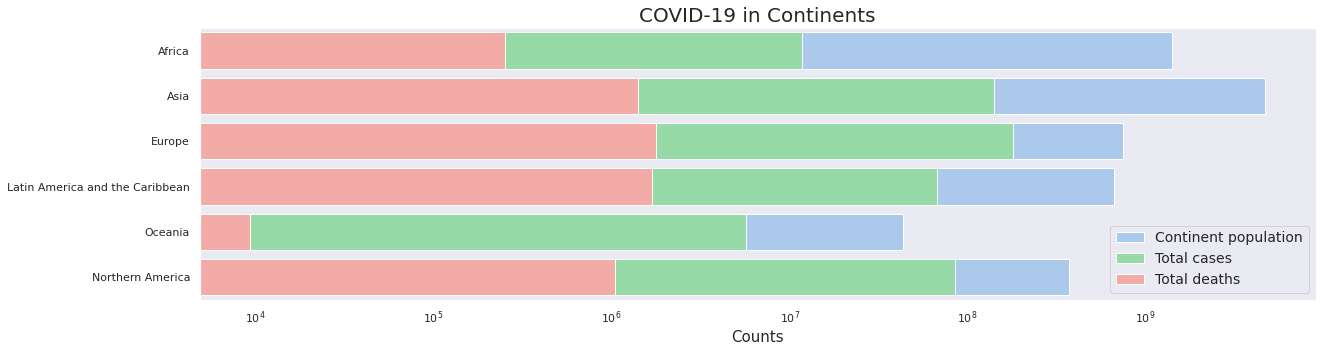

In [34]:
f, ax = plt.subplots(figsize=(20, 5))

sns.set_color_codes("pastel")
sns.barplot(y=SumTable['index'], x=SumTable['Continent population'], data = SumTable,
             label='Continent population', color="b")
sns.set_color_codes("pastel")
sns.barplot(y=SumTable['index'], x=SumTable['Total cases'], data=SumTable,
             label='Total cases', color="g")
sns.set_color_codes("pastel")
sns.barplot(y=SumTable['index'], x=SumTable['Total deaths'], data=SumTable,
             label='Total deaths', color="r")

plt.xscale('log')

plt.ylabel("")
plt.xlabel("Counts", fontsize=15)
plt.xticks()
plt.title('COVID-19 in Continents', fontsize = 20)
plt.legend(fontsize=14)
plt.grid(False)

In [49]:
covid2= covid.set_index('Country') 
top10country_deaths = covid2['Total Deaths'].nlargest(10)
top10country_deaths = top10country_deaths.to_frame()
top10country_cases = covid2['Total Cases'].nlargest(10)
top10country_cases = top10country_cases.to_frame()

In [75]:
top10country_cases

,level_0,index,Country,Total Cases
0,0,0,USA,81839052
1,1,1,India,43029044
2,2,2,Brazil,29999816
3,3,3,France,25997852
4,4,4,Germany,21646375
5,5,5,UK,21216874
6,6,6,Russia,17896866
7,7,7,Turkey,14894731
8,8,8,Italy,14846514
9,9,9,S. Korea,13874216


In [61]:
top10country_deaths

,Country,Total Deaths
0,USA,1008222
1,Brazil,660269
2,India,521388
3,Russia,369708
4,Mexico,323212
5,Peru,212328
6,UK,165570
7,Italy,159784
8,Indonesia,155288
9,France,142506


In [62]:
top10country_cases.reset_index(inplace=True)
top10country_deaths.reset_index(inplace=True)

Text(0.5, 1.0, 'The top 10 countries')

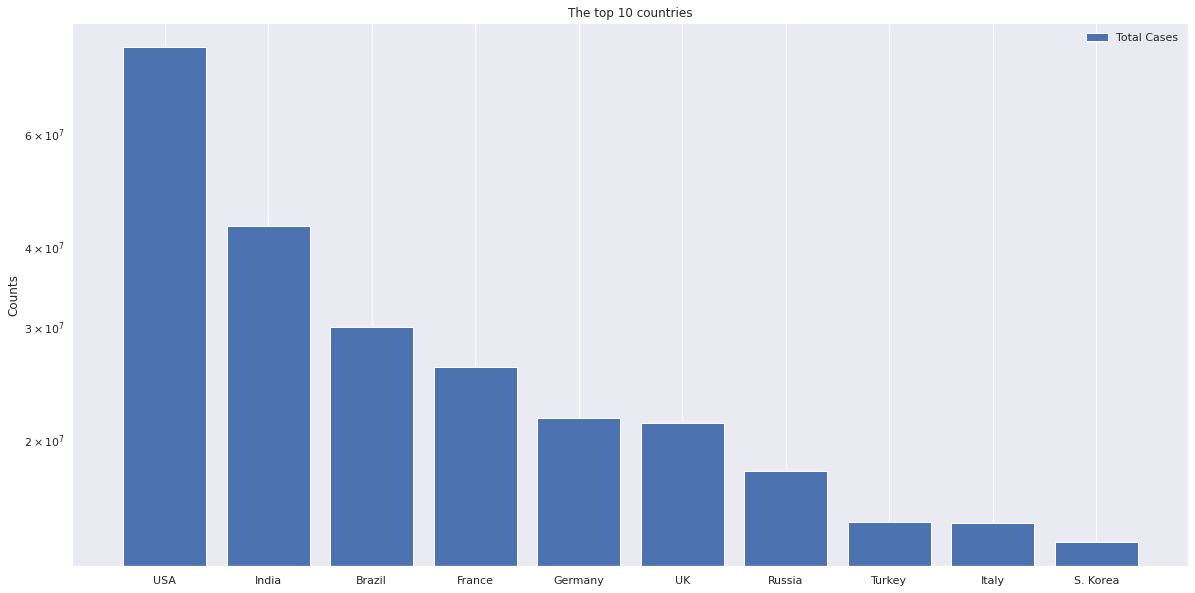

In [76]:
f, ax = plt.subplots(figsize=(20,10))

plt.bar(x=top10country_cases['Country'], height=top10country_cases['Total Cases'], label= 'Total Cases')

plt.yscale('log')
plt.legend(frameon=False)
plt.ylabel('Counts')
plt.title('The top 10 countries')

Text(0.5, 1.0, 'The top 10 countries with the highest deaths on COVID-19')

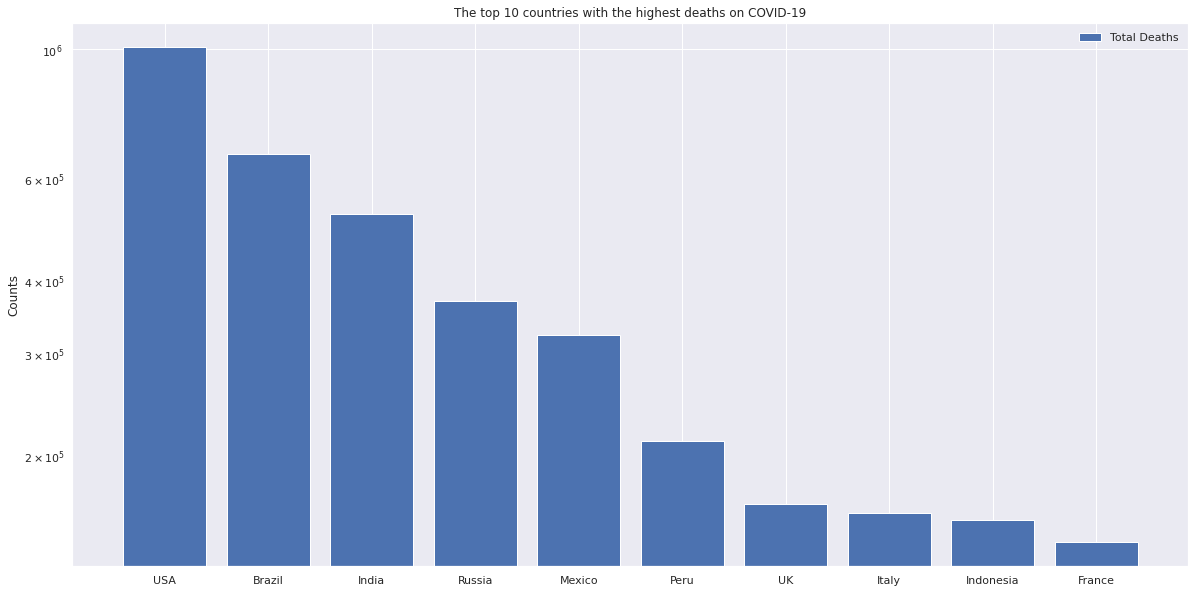

In [78]:
f, ax = plt.subplots(figsize=(20,10))

plt.bar(x=top10country_deaths['Country'], height=top10country_deaths['Total Deaths'], label= 'Total Deaths')

plt.yscale('log')
plt.legend(frameon=False)
plt.ylabel('Counts')
plt.title('The top 10 countries with the highest deaths on COVID-19')

In [35]:
fig = go.Figure(data=go.Choropleth(
    locations = covid['ISO 3166-1 alpha-3 CODE'],
    z = covid['Population'],
    text = covid['Country'],
    colorscale = 'plasma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Population in Billions'))

fig.update_layout(
    title_text='The world population by countries',
    title_x = 0.70,
    geo=dict(showframe=False, showcoastlines=False)) 


fig.show()

In [38]:
fig = go.Figure(data=go.Choropleth(
    locations = covid['ISO 3166-1 alpha-3 CODE'],
    z = covid['Total Cases'],
    text = covid['Country'],
    colorscale = 'plasma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Total cases in Millions'))

fig.update_layout(
    title_text='The total cases of COVID-19 in countries',
    title_x = 0.70,
    geo=dict(showframe=False, showcoastlines=False)) 


fig.show()

In [37]:
fig = go.Figure(data=go.Choropleth(
    locations = covid['ISO 3166-1 alpha-3 CODE'],
    z = covid['Total Deaths'],
    text = covid['Country'],
    colorscale = 'plasma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Total cases in Millions'))

fig.update_layout(
    title_text='The total deaths of COVID-19 in countries',
    title_x = 0.70,
    geo=dict(showframe=False, showcoastlines=False)) 


fig.show()